# Math 387 Honours Numerical Analysis
## Lab assignment 1 Part 2- Newton's and Steffensen's fractals

In [1]:
##Modified by Shenshun Yao; Student ID:260709204
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image

The following piece of code defines the iteration map 

$$\phi(z)=z-\frac{z^3-1}{3z^2}$$

of the Newton-Raphson method for the equation $z^3-1=0$. In addition, the three roots are specified, and a color for each of the roots is chosen.

In [2]:
#Newton-Raphson iteration for z**3-1=0
def phi(z):
    z=complex(z)
    return z+(1/(z*z)-z)/3
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[1,0,0],[0,1,.5],[0,0,1]]

We consider the rectangle $(x_{\textrm{min}},x_{\textrm{max}})\times(y_{\textrm{min}},y_{\textrm{max}})$ in the $z$-plane, and superimpose on it a grid of size $\texttt{imgx}\times\texttt{imgy}$. From each grid point, we start the Newton-Raphson iteration, and depending on the root it converges to, we color the point. Convergence is deemed to occur if the cuurent iterand is within $\varepsilon$ distance of a root. In case the iteration takes too long (i.e., $\texttt{iteration number} > \texttt{maxit}$), or division by zero occurs, we leave the point uncolored (black). We also shade the colors in such a way that darker regions correspond to points that need more iterations to converge to a root.

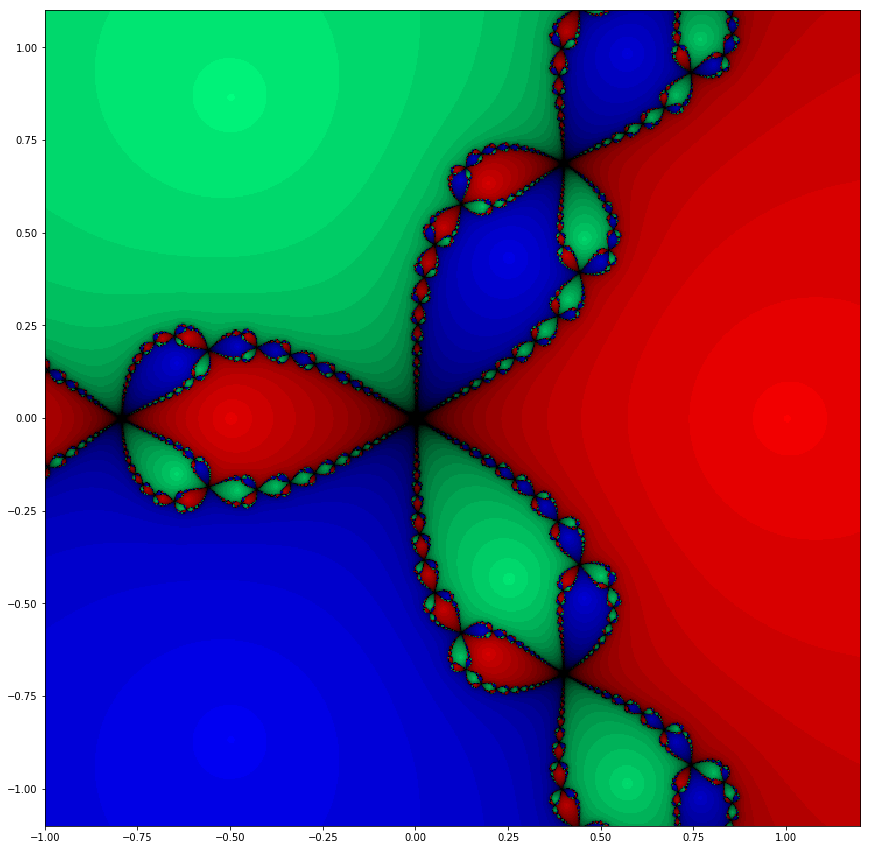

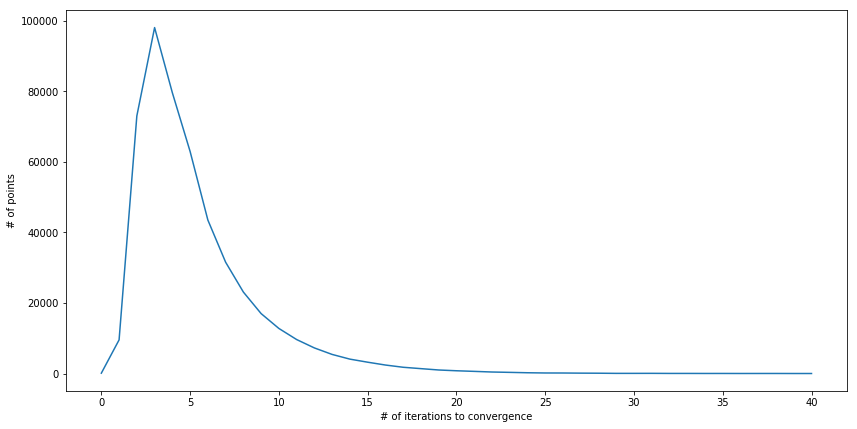

In [3]:
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[np.clip((sit-k)*f*c, 0, 1) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

## Problem 1 :Large monochromatic region
The reason why there is a large monochromatic region around each of the roots is that N-E method has extremely convergence and any point near a root will converge rapidly to that root and do nothing interesting, that is to say we N-R method can quickly find a good approximation.

## Problem 2 : 
### Generating a nice fractal by zooming in on a boundary between two regions by the codes below.

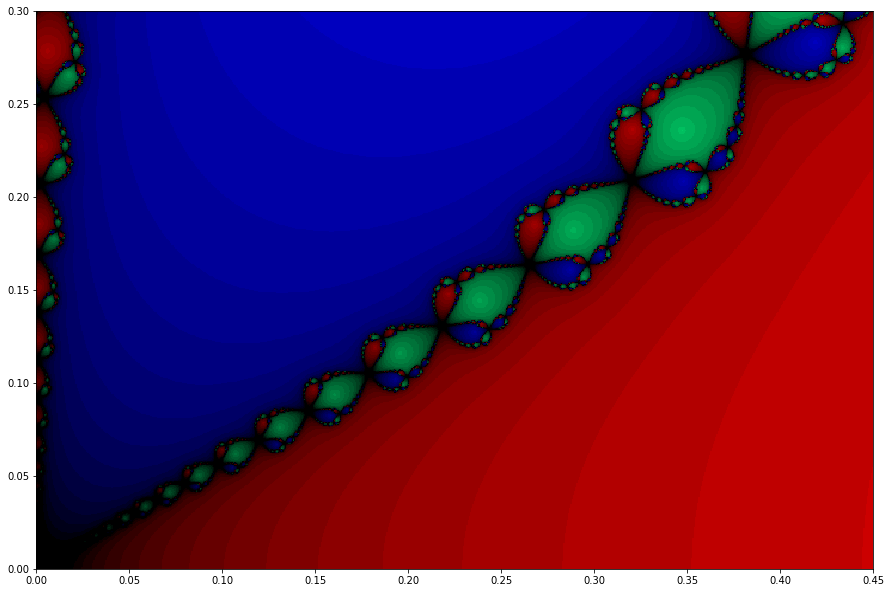

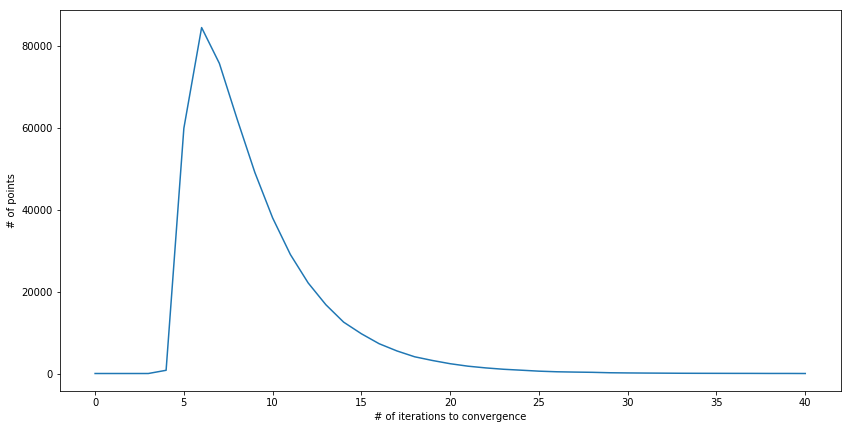

In [4]:
xmin = 0 #Modified to zoom in 
xmax = 0.45 
ymin = 0
ymax =0.3#Modified to zoom in
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[np.clip((sit-k)*f*c,0,1) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

### Heuristical explaination of the fractal nature of the boundary
We find that each of the heart-shaped blobs making up the boundary line is itself composed of boundary lines made up of further heart-shaped blobs,which pattern is a true fractal. The reason why this phenonmenon happens is because if you start with a bad approximation,the function curves up from one intersection with the x-axis and back down to another, and the first initial approximation is near the top part of the arc, the tangent line in the N-R method will intersect the axis with a large distance to the root of the function. The initial aprroximation crosses the maximum value of the curve, and the N-R second approximation flips from one side of the roots to the other, thus expanding a small area into a large one, and the fractual nature of the boundary behavior appears.

## Part 3: A new polynomial with its corresponding Newton-Raphson iteration
The following piece of code defines the iteration map 

$$\phi(z)=z-\frac{z^4-4}{4z^3}$$

of the Newton-Raphson method for the equation $z^4-4=0$. In addition, the four roots are specified, and a color for each of the roots is chosen.

In [5]:
#Newton-Raphson iteration for z**4-4=0
def phi(z):
    z=complex(z)
    return z+(4/(z*z*z)-z)/4
#cubic roots of 1
zz=[np.sqrt(2),-np.sqrt(2),complex(0,np.sqrt(2)),complex(0,-np.sqrt(2))]
#corresponding colors
cc=[[1,0,0],[.5,1,0],[0,1,.5],[0,0,1]]

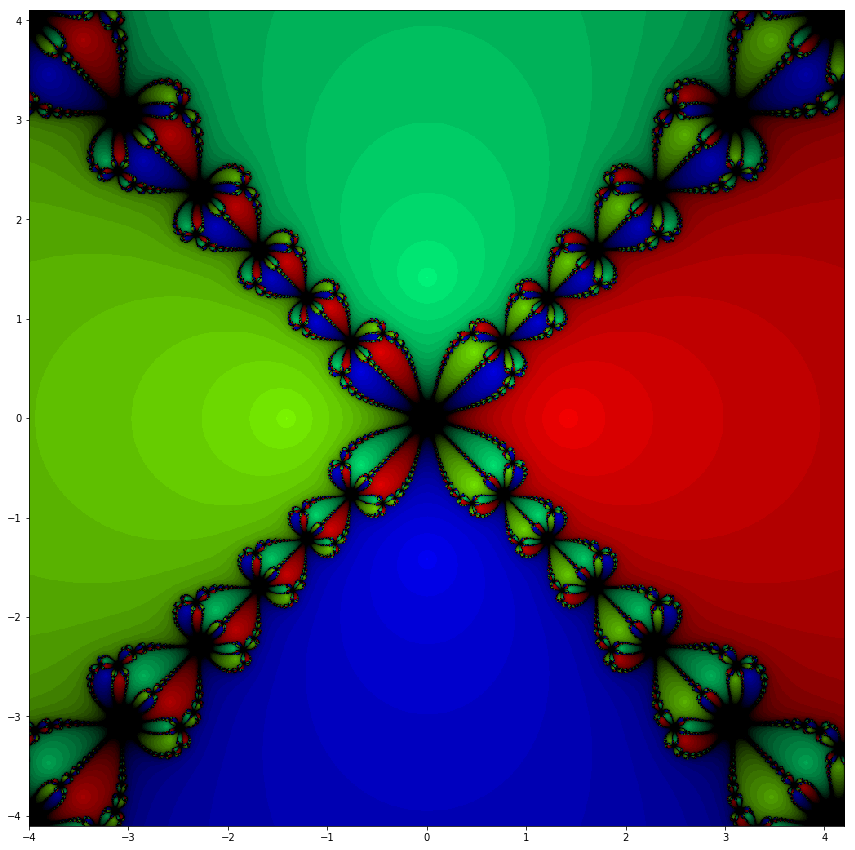

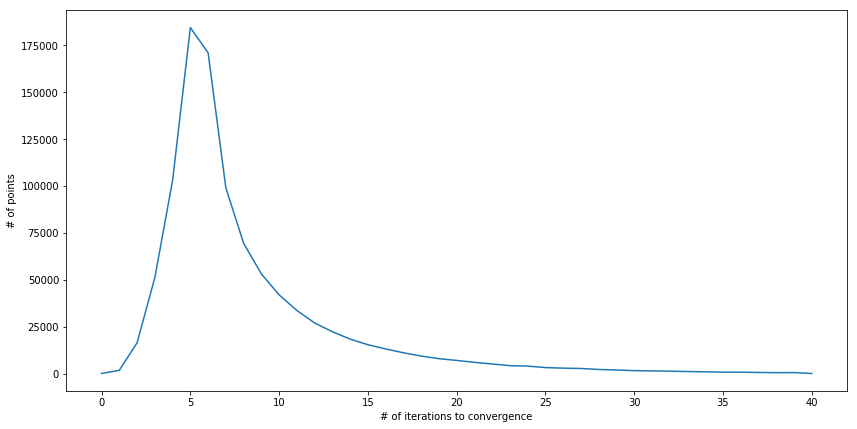

In [6]:
xmin = -4.
xmax = 4.2
ymin = -4.1
ymax = 4.1
eps = .0001
maxit = 40
imgx = 1000
imgy = 1000
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[np.clip((sit-k)*f*c,0,1) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

### Explaination of the resulting graphics: 
The behavior is very similar to our expectation, around each root there exists large monochromatic region, on the boundary line there are many small fractals.

## Part 4: Steffensen's Method
$$\phi(z) = z - \frac{\omega f(z)^2}{f(z+\omega f(z))-f(z)}$$
The above iteration is called the Steffensen's iteration for some function $f$ and $\omega \in \mathbb R$ is a constant. If $\omega =1$, we call it classical Steffensen's Method. We change the value of $\omega$ start from $1$ and then explain the behavior.

In [7]:
#Steffensen's iteration for z**3-1=0
def newphi(z,w):
    z=complex(z)
    f=z**3-1
    return z-((w*(f**2))/((z+w*f)**3-z**3))
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[1,0,0],[0,1,.5],[0,0,1]]

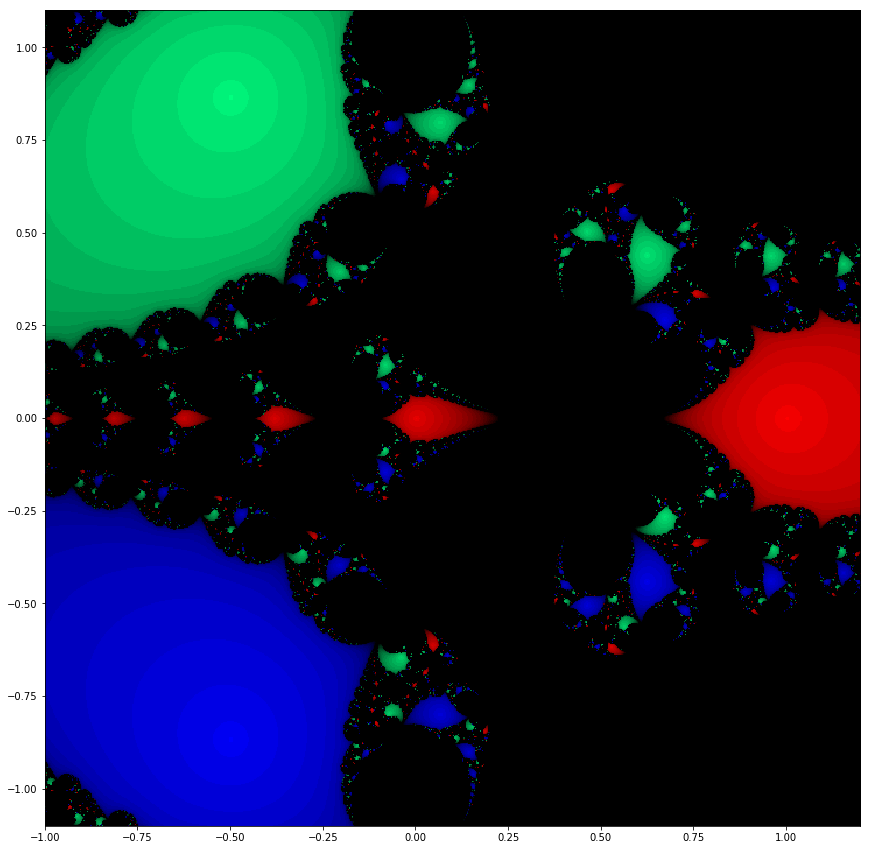

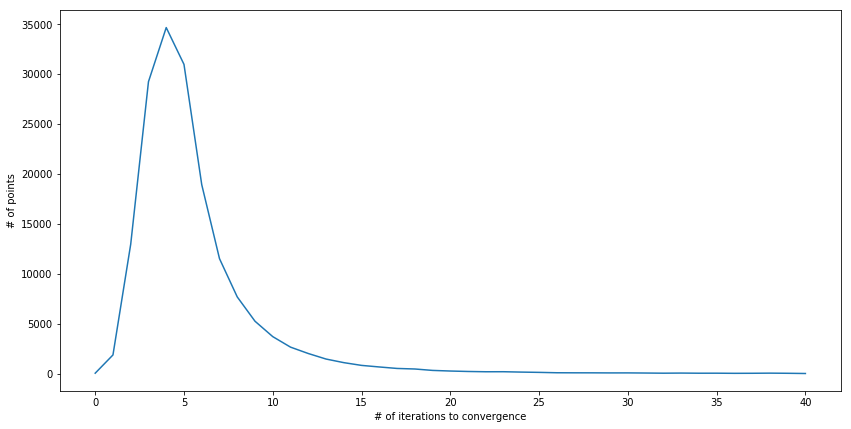

In [8]:
w=1 # The initial case that the omega is 1
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=newphi(z0,w)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[np.clip((sit-k)*f*c,0,1) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

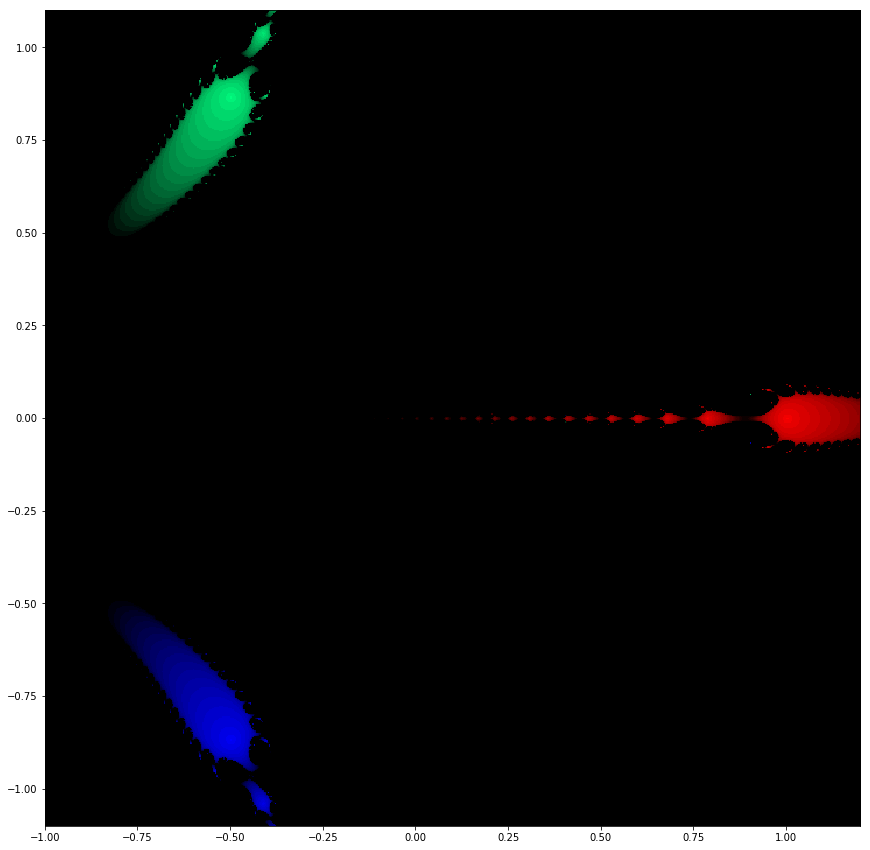

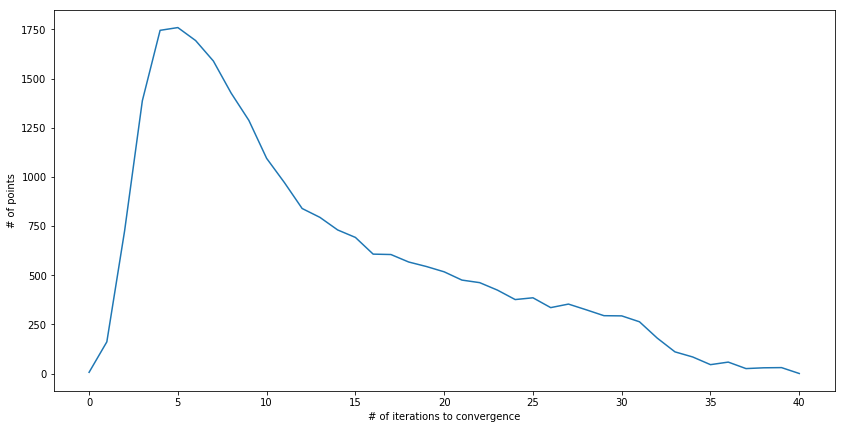

In [9]:
w=5 #change the omega to 5
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=newphi(z0,w)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[np.clip((sit-k)*f*c,0,1) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

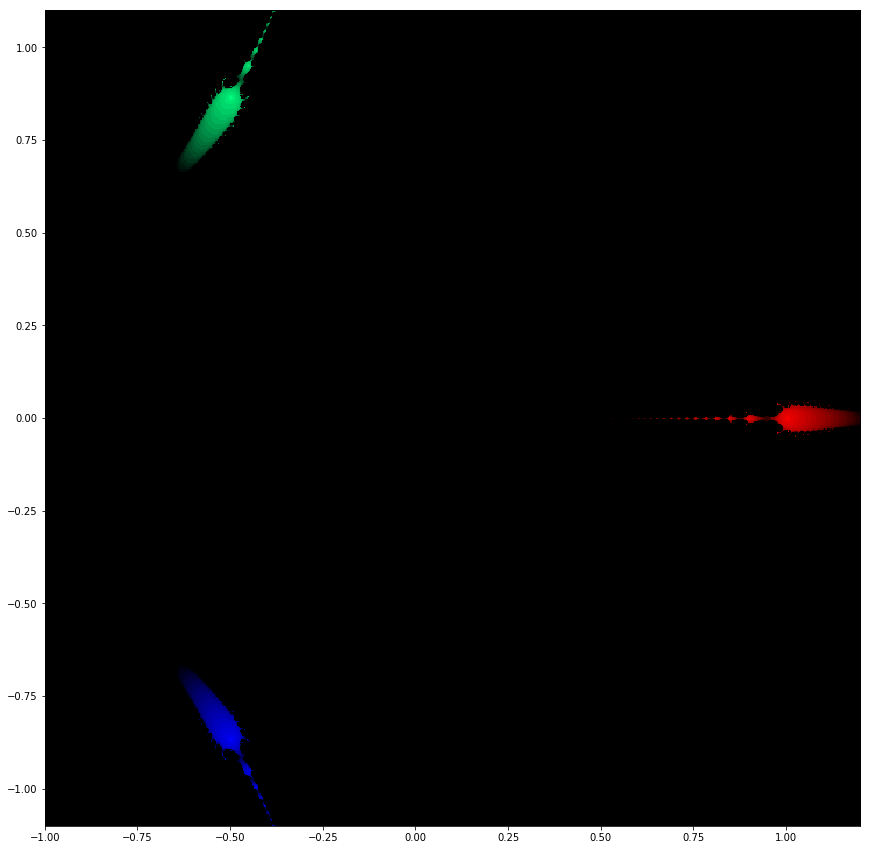

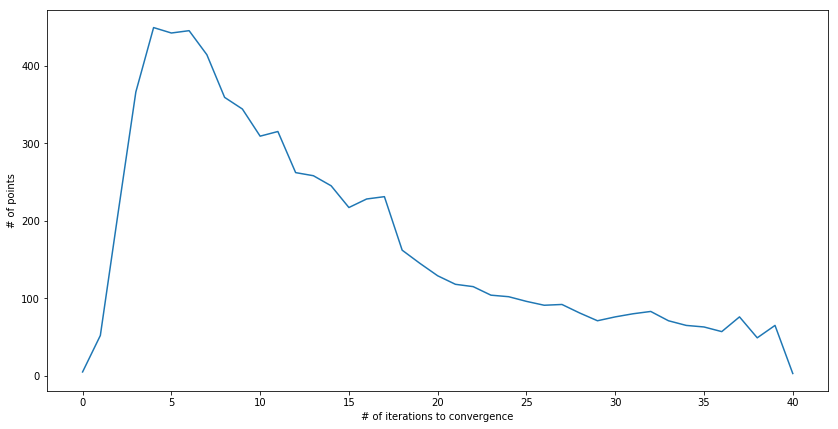

In [10]:
w=10 #change the omega to 20
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=newphi(z0,w)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[np.clip((sit-k)*f*c,0,1) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

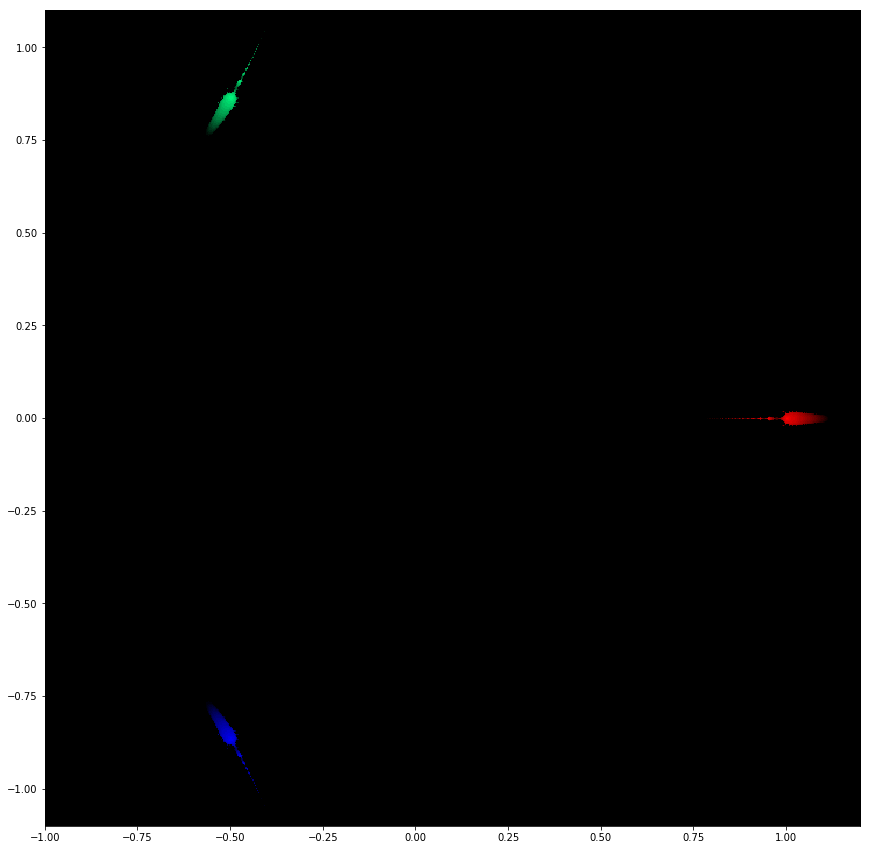

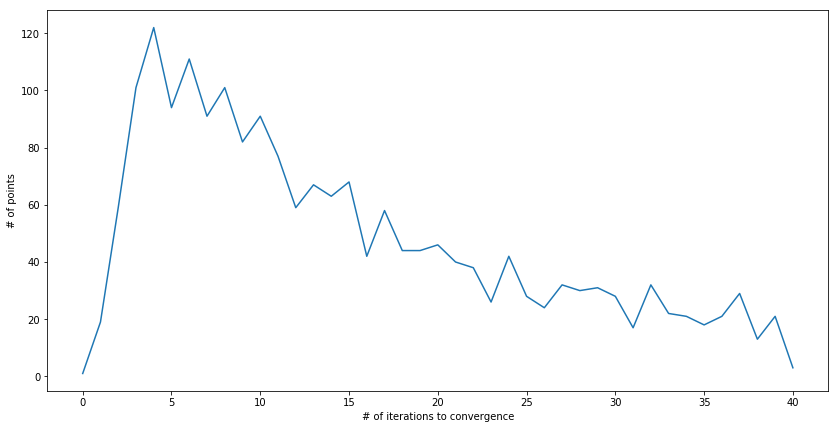

In [11]:
w=20 #change the omega to 20
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=newphi(z0,w)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[np.clip((sit-k)*f*c,0,1) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

### Explaination of the Steffensen's fractals:
We glimpse at the graphics above, they are all Steffenson's fractals but we set different $\omega$. Note that the darker region means that the  corresponding points need more iterations to converge to a root, so we can say that Steffensen's method is worse than N-R method. And as the $\omega$ increases we find that the uncolored regions become larger too. Therefore the iteration performs when $\omega$ is small, and it becomes worse as the increasing of $\omega$.

## Part 5: The convergence of Steffensen's Method
### We will prove the Steffensen's Method is locally a quadratically convergent method.
#### Proof:

Firstly we pick $\omega = 1$ and we can write the Steffensen's iteration as

$$
\phi(z） = z- \frac{f(z)}{g(z)}\ \ s.t.\ \ g(z) = \frac{f(z+f(z))-f(z)}{f(z)}
$$

Let $x$ be a solution of $f(x) = 0$ and $f'(x) \neq 0$, we also assume $||f''||$ is bounded in a neighborhood of $x$. By the way, we can also assume that there is $z_o$ ehich is sufficiently close to $x$.
Denote $z_1$ is the first iteration and so $z_n$ is the $n$-th iteration. Since $\exists \delta , \ z_0 \in (x-\delta,x+\delta)$, by Steffensen's method, $\exists \delta , \ z_n \in (x-\delta,x+\delta)$ for every $n \in \mathbb N^{+}$. We will discuss this $\delta$ later.

By Taylor's theorem,there exists $\epsilon_n \in (z_n,z_n+f(z_n)$,
$$
f(z_n+f(z_n)) = f(z_n) + f(z_n)f'(z_n) + \frac{1}{2}f''(\epsilon_n)f(z_n)^{2}
\implies g(z_n) = f'(z_n) + \frac{1}{2}f''(\epsilon_n)f(z_n).
$$

Assume $y_n = z_n -x$, it follows that
$$
y_{n+1}= z_{n+1} - x = y_n - \frac{f(z_n)}{ f'(z_n) + \frac{1}{2}f''(\epsilon_n)f(z_n)},
$$
then we still using Taylor's theorem,
$$
f(x) = 0 = f(z_n-y_n) = f(z_n) - f'(z_n)\cdot y_n + \frac{1}{2}f''(\zeta_n)y_n^{2}
$$
for some $\zeta$ between $z_n$ and $y_n$.

Therefore
\begin{align}
y_{n+1} &= y_n - y_n \cdot \frac{f'(z_n) y_n + \frac{1}{2}f''(\zeta_n)y_n}{ f'(z_n) + \frac{1}{2}f''(\epsilon_n)f(z_n)}
\\ &=  y_n - y_n \cdot \frac{f'(z_n)\cdot y_n-\frac{1}{2}f''(\epsilon_n)f(z_n)+\frac{1}{2}f''(\epsilon_n)f(z_n)+\frac{1}{2}f''(\zeta_n)y_n}{ f'(z_n) + \frac{1}{2}f''(\epsilon_n)f(z_n)}
\\ &= -y_n \cdot \frac{f''(\epsilon_n)f(z_n)+ f''(\zeta_n)y_n}{ 2f'(z_n) + f''(\epsilon_n)f(z_n)}
\\ &= -y_n \cdot \frac{f''(\epsilon_n)(f'(z_n)y_n + \frac{1}{2}f''(\zeta_n)y_n^{2})+ f''(\zeta_n)y_n}{ 2f'(z_n) + f''(\epsilon_n)f(z_n)}
\\ &= -y_n^2 \cdot \frac{f''(\epsilon_n)(f'(z_n) + \frac{1}{2}f''(\zeta_n)y_n)+ f''(\zeta_n)}{ 2f'(z_n) + f''(\epsilon_n)f(z_n)} (*)
\end{align}
Assume there's a function s.t.
$$
\kappa（z,\epsilon, \zeta）= \frac{f''(\epsilon)(f'(z) + \frac{1}{2}f''(\zeta)(z-x))+ f''(\zeta)}{ 2f'(z) + f''(\epsilon)f(z)} 
$$
By assumption that supremum of $|\kappa（z,\epsilon, \zeta)|$ exists as $z,\epsilon, \zeta$ all converge to $x$, let 
$$M = \sup|\kappa（z,\epsilon, \zeta)|,$$
thus there exists some $\delta_1>0$ s.t.
$$|\kappa（z,\epsilon, \zeta)| \leq 2M, \forall z,\epsilon,\zeta \in (x-\delta_1,x+\delta_1),$$
we also assume that $|z-x|<\delta_2$ implies that $|f(z)| \leq 2\delta_1$. Therefore, we define
$$\delta = \min \{ \frac{\delta_1}{2}, \delta_2, \frac{1}{2C}\}.$$
By the way, $(*) = -y_n^2 \kappa(z_n,\epsilon,\zeta).$

We consider that $z_n \in (x-\delta,x+\delta), \forall n\in\mathbb N^+$.Then we will do the induction step for $z_{n+1}$:
\begin{align}
&|\zeta_n-x| \leq \delta < \delta_1 \implies \zeta_n \in (x-\delta_1,x+\delta_1);
\\& |\epsilon_n -x| \leq |\epsilon_n - z_n|+|z_n-x| \leq |f(z_n)|+|z_n-x| < \delta_1 \implies  \epsilon_n \in (x-\delta_1,x+\delta_1);
\\ &z_n \in (x-\delta,x+\delta),\text{already holds}
\end{align}
By $|\kappa（z,\epsilon, \zeta)| \leq 2M$,
$$
|z_{n+1} -x|=|y_{n+1}|\leq 2M\cdot y_n^{2} = 2M|z_n -x|^2 \leq 2M\delta^2 < \delta
$$
Hence we proved that $z_{n+1} \in (x-\delta,x+\delta)$, we finished the induction. Also, by
$$|\phi(z) -x| \leq 2M|z -x|^2 \ \ \text{where} \ M = \sup [\frac{f''(\epsilon)(f'(z) + \frac{1}{2}f''(\zeta)(z-x))+ f''(\zeta)}{ 2f'(z) + f''(\epsilon)f(z)}] \ \ \text{with $z,\epsilon, \zeta$ all converge to $x$}.$$
Therefore, Steffensen's method is locally quadratically convergent. Q.E.D